In [1]:
import numpy as np
import math as math
import random
import time
from scipy import linalg, sparse
import warnings
warnings.filterwarnings('ignore')

matrix_type = 'coo'

def I_n(n):
    return sparse.identity(n, dtype=float, format='coo')

def omega_n(n):
    return np.exp(((-(complex(0, 2))*np.pi)/(n)))

def omega_n1(n):
    return np.exp((((complex(0, 2))*np.pi)/(n)))

def Omega_n(n):
    o = omega_n(2*n)
    a = [o**i for i in range(n)]
    return sparse.diags(a)

def B_n(n):
    m = int(n/2)
    I = I_n(m)
    O = Omega_n(m)
    return sparse.bmat([[I, O], [I, -O]]).toarray()

def reverse_bit(num, osn):
    result = 0;
    while osn:
        osn-=1
        result += result + (num % 2)
        num >>= 1
    return result

def swapRow(A, n):
    a = np.zeros(shape=(2**n), dtype=complex)
    for i in range(2**n):
        a[i] = (A[reverse_bit(i,n)])
    return a

def myfft(N,x):
    x = ((swapRow(x,N))).transpose()
    for i in range(1, N+1):
        s = 2**i
        ss = int(s/2)
        o = omega_n(s)
        a = [omega_n(s)**i for i in range(ss)]
        for j in range(2**(N-i)):
            cur = x[s*j:s*(j + 1)].copy()
            for k in range(ss):
                x[s*j + k] = cur[k] + cur[k + ss] * a[k]
            for k in range(ss):
                x[s*j + k + ss] = cur[k] - cur[k + ss] * a[k]
    return x

def Difft(x, N):
    x = ((swapRow(x,N))).transpose()
    for i in range(1, N+1):
        s = 2**i
        ss = int(s/2)
        a = [omega_n1(s)**i for i in range(ss)]
        for j in range(2**(N-i)):
            cur = x[s*j:s*(j + 1)].copy()
            for k in range(ss):
                x[s*j + k] = cur[k] + cur[k + ss] * a[k]
            for k in range(ss):
                x[s*j + k + ss] = cur[k] - cur[k + ss] * a[k]
    return x/2**N

In [2]:
from scipy.fftpack import fft, ifft 
n = 3
x =[] 
for i in range(2**n): 
    x.append(math.ceil(random.random()*10)) 
print("x",x) 

Myfft = myfft(n,x)

print("after Myfft",Myfft)

Myifft1 = Difft(Myfft,n)

_fft = fft(x) 

print("fft",_fft)

print("after MyIfft",Myifft1)

print("Myfft - fft",np.linalg.norm(Myfft - _fft)) 
print("Myfft - Myifft",np.linalg.norm(x - Myifft1)) 
#
#print(np.linalg.norm(x - myifft(n, Myfft)))

x [7, 3, 7, 6, 6, 9, 7, 6]
after Myfft [51.        +0.j         -3.24264069+4.24264069j -1.        +0.j
  5.24264069+4.24264069j  3.        +0.j          5.24264069-4.24264069j
 -1.        +0.j         -3.24264069-4.24264069j]
fft [51.        +0.j         -3.24264069+4.24264069j -1.        -0.j
  5.24264069+4.24264069j  3.        +0.j          5.24264069-4.24264069j
 -1.        +0.j         -3.24264069-4.24264069j]
after MyIfft [7.+0.j 3.+0.j 7.+0.j 6.+0.j 6.+0.j 9.+0.j 7.+0.j 6.+0.j]
Myfft - fft 1.7763568394002505e-15
Myfft - Myifft 4.440892098500626e-16


fft norm [0.0, 0.0, 0.0, 3.2177320244274195e-15, 1.0695084443661336e-14, 2.9397229829860133e-14, 1.4166445794216997e-13, 4.601996975134326e-13, 1.6072569544780931e-12, 5.631947413288312e-12, 2.4455097261373088e-11, 5.2957181767564735e-11, 3.158692256093109e-10, 5.802449842411092e-10, 6.315558458031707e-09, 3.2877149819866425e-08]
ifftnorm [0.0, 0.0, 1.2989340843532398e-16, 1.912709747813338e-15, 3.9697916967842604e-15, 4.192594641529138e-15, 2.7716810459383774e-14, 6.9358677023567e-14, 1.7170382608990255e-13, 3.7174874543354336e-13, 1.2919615526319606e-12, 1.6947550616962247e-12, 8.143021555193747e-12, 9.642800028968861e-12, 7.975121518542176e-11, 3.1168120543225113e-10]
My fft time [2.5658999220468104e-05, 4.5863998821005225e-05, 0.00023028200666885823, 0.00011225500202272087, 0.00021873599325772375, 0.0004220770060783252, 0.0008970739872893319, 0.0018945360061479732, 0.003497532001347281, 0.008269955011201091, 0.015113956003915519, 0.032731188999605365, 0.06847657400066964, 0.1453693

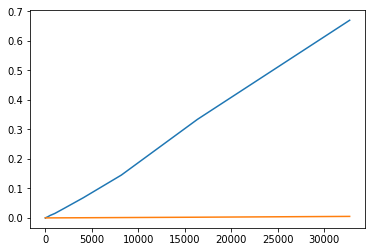

In [12]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft 
n = 16
mytime=[]
myiffttime=[]
ffttime=[]
fftnorm=[]
ifftnorm=[]
for i in range(n):
    x =[]

    for j in range(2**i): 
        x.append(math.ceil(random.random()*10)) 
    start_time = time.clock() 
    Myfft = myfft(i,x) 
    mytime.append(time.clock()-start_time)

    start_time = time.clock() 
    _fft = fft(x) 
    ffttime.append(time.clock()-start_time)

    fftnorm.append(np.linalg.norm(Myfft - _fft)) 
    
    ifftnorm.append(np.linalg.norm(x - Difft(Myfft,i)))

    
    
print("fft norm",fftnorm)
print("ifftnorm",ifftnorm)

print("My fft time",mytime)
print("fft time",ffttime)
xx = np.arange(n)
xxx = 2**xx
fig = plt.figure()
plt.plot(xxx, mytime)

plt.plot(xxx, ffttime)


In [54]:
B_n(2**2)

array([[ 1.000000e+00+0.j,  0.000000e+00+0.j,  1.000000e+00+0.j,
         0.000000e+00+0.j],
       [ 0.000000e+00+0.j,  1.000000e+00+0.j,  0.000000e+00+0.j,
         6.123234e-17-1.j],
       [ 1.000000e+00+0.j,  0.000000e+00+0.j, -1.000000e+00+0.j,
         0.000000e+00+0.j],
       [ 0.000000e+00+0.j,  1.000000e+00+0.j,  0.000000e+00+0.j,
        -6.123234e-17+1.j]])

In [62]:
16//4

4

In [6]:
import numpy as np
n = 2**2
b = B_n(n)
m = len(b)
z = np.zeros(shape = (m,m), dtype = complex)
t = np.bmat([[b,z],[z,b]])
print(t)

[[ 1.000000e+00+0.j  0.000000e+00+0.j  1.000000e+00+0.j  0.000000e+00+0.j
   0.000000e+00+0.j  0.000000e+00+0.j  0.000000e+00+0.j  0.000000e+00+0.j]
 [ 0.000000e+00+0.j  1.000000e+00+0.j  0.000000e+00+0.j  6.123234e-17-1.j
   0.000000e+00+0.j  0.000000e+00+0.j  0.000000e+00+0.j  0.000000e+00+0.j]
 [ 1.000000e+00+0.j  0.000000e+00+0.j -1.000000e+00+0.j  0.000000e+00+0.j
   0.000000e+00+0.j  0.000000e+00+0.j  0.000000e+00+0.j  0.000000e+00+0.j]
 [ 0.000000e+00+0.j  1.000000e+00+0.j  0.000000e+00+0.j -6.123234e-17+1.j
   0.000000e+00+0.j  0.000000e+00+0.j  0.000000e+00+0.j  0.000000e+00+0.j]
 [ 0.000000e+00+0.j  0.000000e+00+0.j  0.000000e+00+0.j  0.000000e+00+0.j
   1.000000e+00+0.j  0.000000e+00+0.j  1.000000e+00+0.j  0.000000e+00+0.j]
 [ 0.000000e+00+0.j  0.000000e+00+0.j  0.000000e+00+0.j  0.000000e+00+0.j
   0.000000e+00+0.j  1.000000e+00+0.j  0.000000e+00+0.j  6.123234e-17-1.j]
 [ 0.000000e+00+0.j  0.000000e+00+0.j  0.000000e+00+0.j  0.000000e+00+0.j
   1.000000e+00+0.j  0.000000e+0